# Sravya Somala (c0907007)

In [483]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline


# Dataset Selection

In [484]:
# load the dataset
df = pd.read_csv('train.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Preprocessing

In [485]:
print("Dataset Summary:\n")
print(df.describe())  # Summary statistics for numerical columns
print("\nData Types:\n", df.dtypes)  # Data types of all columns


Dataset Summary:

            sl_no      gender       ssc_p       hsc_p    degree_p     etest_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000    0.353488   67.303395   66.333163   66.370186   72.100558   
std     62.209324    0.479168   10.827205   10.897509    7.358743   13.275956   
min      1.000000    0.000000   40.890000   37.000000   50.000000   50.000000   
25%     54.500000    0.000000   60.600000   60.900000   61.000000   60.000000   
50%    108.000000    0.000000   67.000000   65.000000   66.000000   71.000000   
75%    161.500000    1.000000   75.700000   73.000000   72.000000   83.500000   
max    215.000000    1.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p         salary  
count  215.000000     148.000000  
mean    62.278186  288655.405405  
std      5.833385   93457.452420  
min     51.210000  200000.000000  
25%     57.945000  240000.000000  
50%     62.000000  265000.000000  
75%    

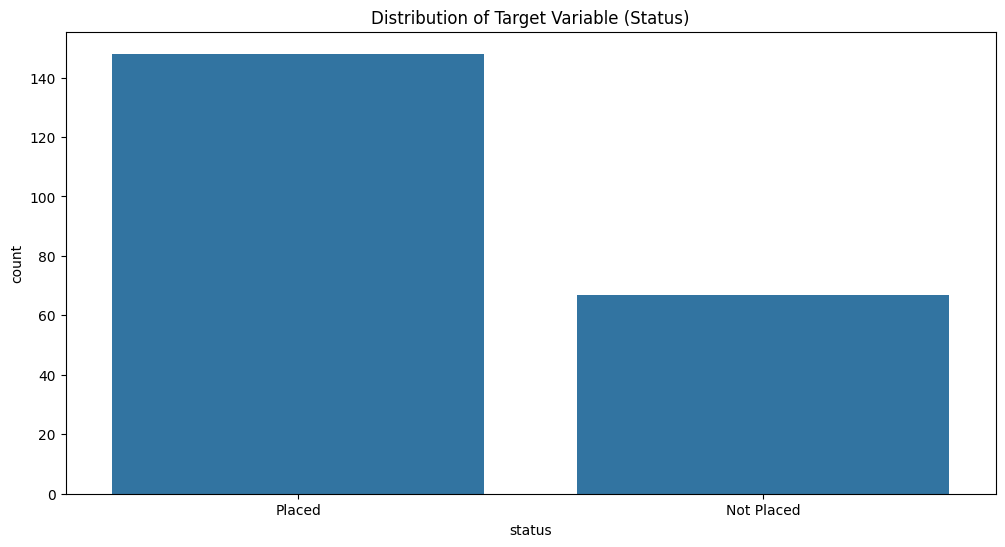

In [486]:
# Visualizations for EDA
plt.figure(figsize=(12, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Target Variable (Status)')
plt.show()

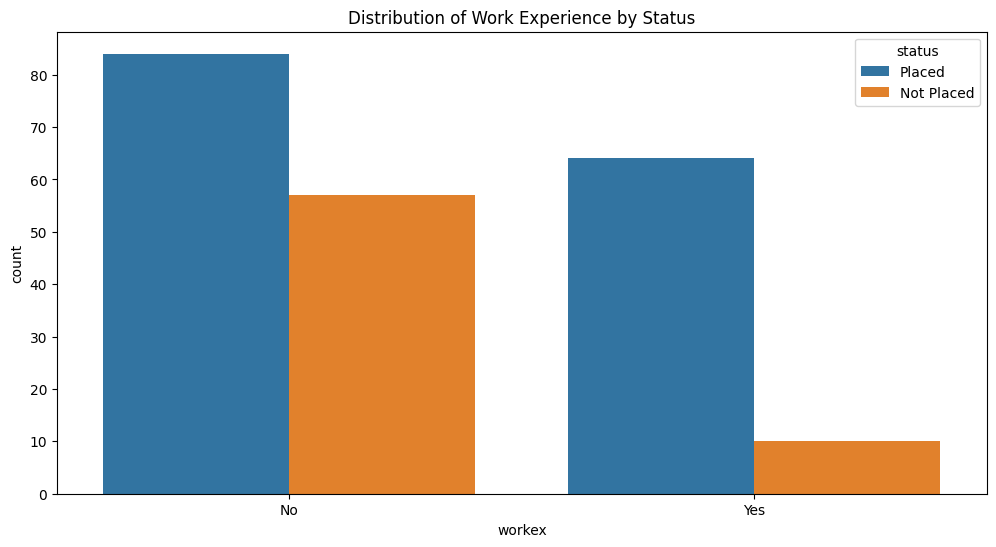

In [487]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workex', hue='status', data=df)
plt.title('Distribution of Work Experience by Status')
plt.show()

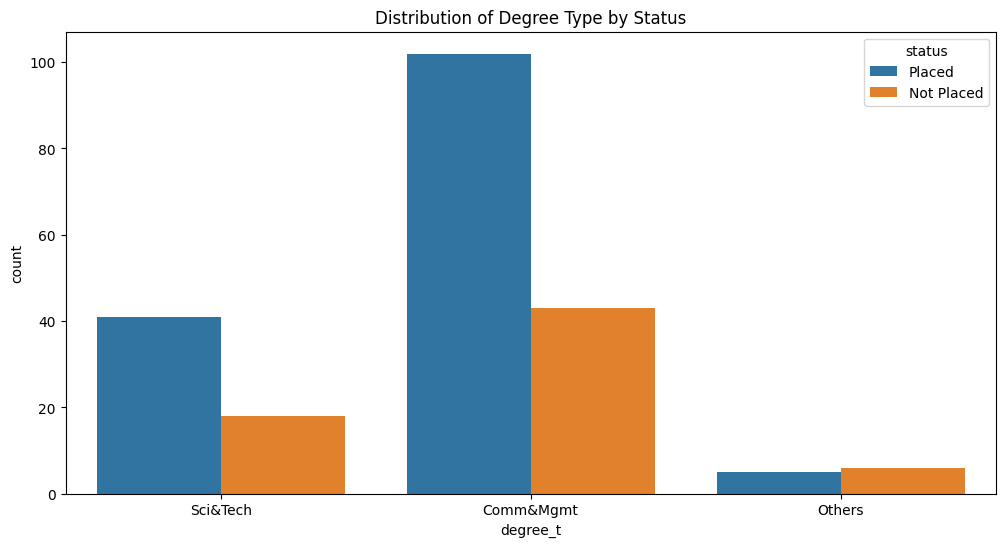

In [488]:
plt.figure(figsize=(12, 6))
sns.countplot(x='degree_t', hue='status', data=df)
plt.title('Distribution of Degree Type by Status')
plt.show()

In [489]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [490]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [491]:
# null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [492]:
# drop salary column
df = df.drop('salary', axis=1)  # as it does not have any effect in predicting the status

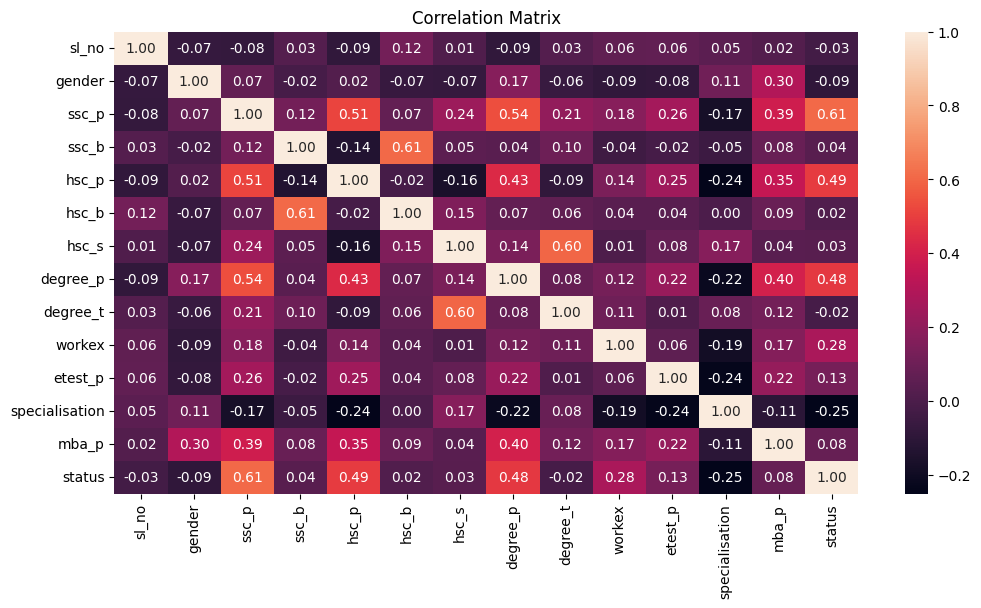

In [493]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [494]:
# split the data
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [495]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-496-b335cab8ca77>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


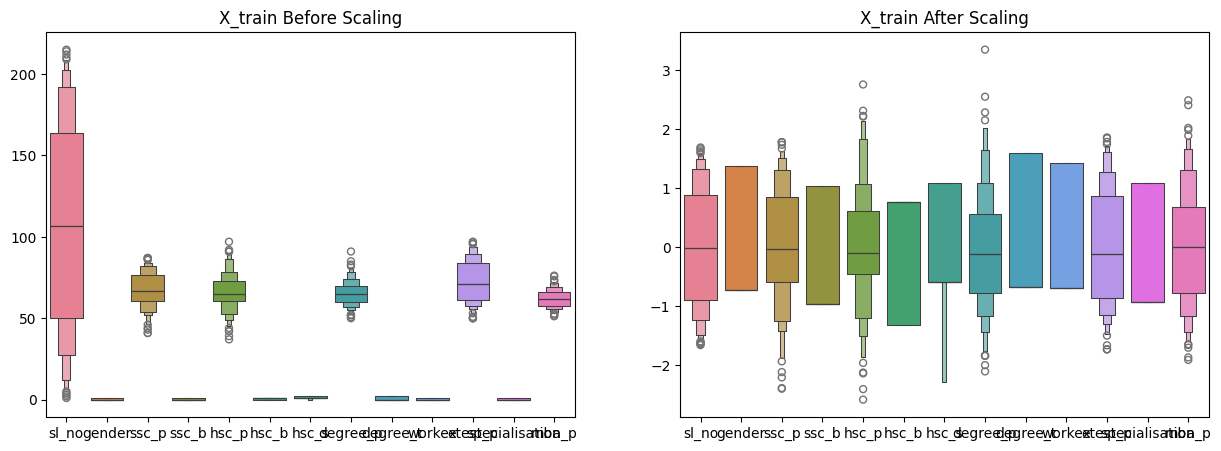

In [496]:
# visualize the data before and after scaling
before_scaling_df = pd.DataFrame(X_train, columns=X.columns)
after_scaling_df = pd.DataFrame(X_train_scaled, columns=X.columns)

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxenplot(data=before_scaling_df)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxenplot(data=after_scaling_df)
plt.title('X_train After Scaling')
plt.show()

# Model Selection

In [497]:
from sklearn.svm import SVC

model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [1, 5, 10],
            'solver': ['liblinear', 'saga']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy']
        }
    },
    'svc': {
        'model': SVC(),
        'params': {
            'C': [1, 5, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    }
}

# Conducting Grid Search

In [498]:
# conducting grid search to find the best model and parameters
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_model_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df_model_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                    model  best_score  \
0      LogisticRegression    0.866667   
1                     knn    0.840000   
2  RandomForestClassifier    0.860000   
3                     svc    0.846667   

                                 best_params  
0            {'C': 1, 'solver': 'liblinear'}  
1   {'n_neighbors': 5, 'weights': 'uniform'}  
2  {'criterion': 'gini', 'n_estimators': 50}  
3               {'C': 1, 'kernel': 'linear'}  


# Evaluation

In [499]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  return accuracy, precision, recall, f1, cm

In [500]:
# Dictionary to map model names to their respective classes
model_classes = {
    'LogisticRegression': LogisticRegression,
    'RandomForestClassifier': RandomForestClassifier,
    'KNeighborsClassifier': KNeighborsClassifier,
    'SVC': SVC
}


Metrics for LogisticRegression:
Accuracy: 0.8307692307692308
Precision: 0.851063829787234
Recall: 0.9090909090909091
F1 Score: 0.8791208791208791


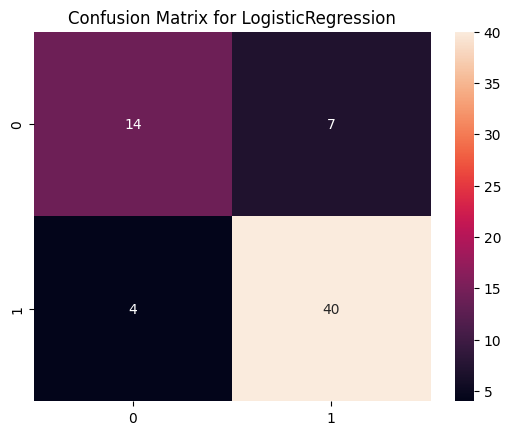

Metrics for knn:
Accuracy: 0.7538461538461538
Precision: 0.7413793103448276
Recall: 0.9772727272727273
F1 Score: 0.8431372549019609


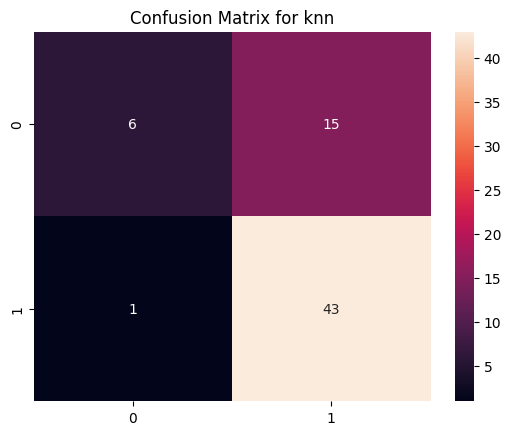

Metrics for RandomForestClassifier:
Accuracy: 0.8153846153846154
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1 Score: 0.875


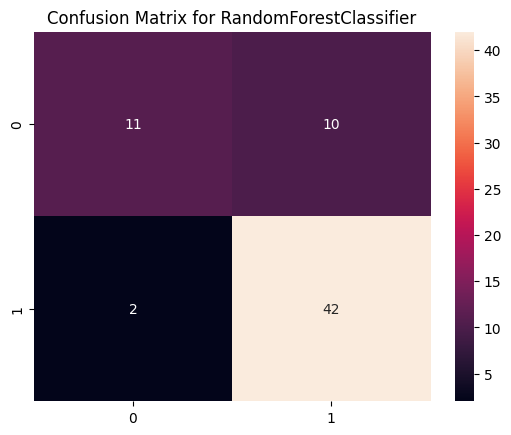

In [501]:
# Train and evaluate each model
models_evaluated = {}
for index, row in df_model_scores.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    model_class = model_classes.get(model_name.replace('knn', 'KNeighborsClassifier'))
    if model_class is None:
        print(f"Warning: Model '{model_name}' not found in model_classes.")
        continue
    model = model_class(**best_params)
    model.fit(X_train_scaled, y_train)
    metrics = evaluate_model(model, X_test_scaled, y_test)
    models_evaluated[model_name] = metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {metrics[0]}")
    print(f"Precision: {metrics[1]}")
    print(f"Recall: {metrics[2]}")
    print(f"F1 Score: {metrics[3]}")
    sns.heatmap(metrics[4], annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


Metrics for svc:
Accuracy: 0.8461538461538461
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1 Score: 0.888888888888889


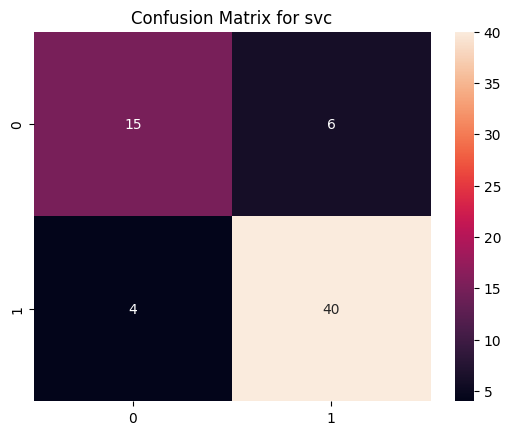

In [502]:
# Modify your loop to handle case sensitivity issues
models_evaluated = {}
for index, row in df_model_scores.iterrows():
    model_name = row['model'].lower()  # Convert model name to lowercase
    best_params = row['best_params']

    if model_name == 'svc':
        model = make_pipeline(StandardScaler(), SVC(**best_params))
    else:
        model_class = model_classes.get(model_name)
        if model_class is None:
            print(f"Warning: Model '{model_name}' not found in model_classes.")
            continue
        model = model_class(**best_params)

    model.fit(X_train_scaled if model_name == 'svc' else X_train, y_train)
    metrics = evaluate_model(model, X_test_scaled if model_name == 'svc' else X_test, y_test)
    models_evaluated[model_name] = metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {metrics[0]}")
    print(f"Precision: {metrics[1]}")
    print(f"Recall: {metrics[2]}")
    print(f"F1 Score: {metrics[3]}")
    sns.heatmap(metrics[4], annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Voting Classifier

In [503]:
# define the voting classifier
from sklearn.ensemble import VotingClassifier

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(**df_model_scores.loc[df_model_scores['model'] == 'LogisticRegression', 'best_params'].values[0])),
    ('knn', KNeighborsClassifier(**df_model_scores.loc[df_model_scores['model'] == 'knn', 'best_params'].values[0])),
    ('rf', RandomForestClassifier(**df_model_scores.loc[df_model_scores['model'] == 'RandomForestClassifier', 'best_params'].values[0])),
    ('svc', SVC(**df_model_scores.loc[df_model_scores['model'] == 'svc', 'best_params'].values[0]))
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(n_estimators=50)),
                             ('svc', SVC(C=1, kernel='linear'))])

(0.8307692307692308, 0.851063829787234, 0.9090909090909091, 0.8791208791208791, array([[14,  7],
       [ 4, 40]]))
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65

[[14  7]
 [ 4 40]]
0.8307692307692308
0.8791208791208791


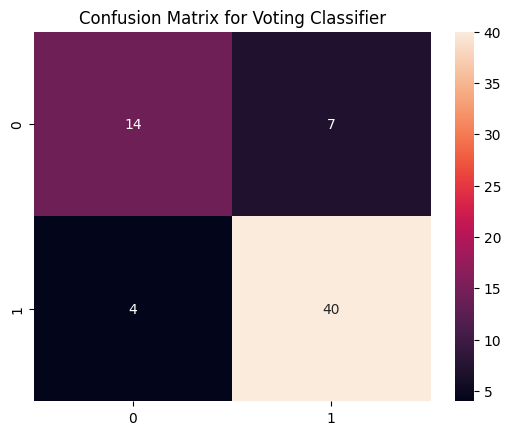

In [504]:
# evaluation
metrics = evaluate_model(voting_clf, X_test_scaled, y_test)
print(metrics)
print(classification_report(y_test, voting_clf.predict(X_test_scaled)))
print(confusion_matrix(y_test, voting_clf.predict(X_test_scaled)))
print(accuracy_score(y_test, voting_clf.predict(X_test_scaled)))
print(f1_score(y_test, voting_clf.predict(X_test_scaled)))
sns.heatmap(confusion_matrix(y_test, voting_clf.predict(X_test_scaled)), annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()
